# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json, pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key, geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [173]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [174]:
# The option to use the name of the city has been deperacated and allows only th lat and lon. using geocoding from the
# openweathermap provides an accurate response of the lat and lon of the provided city.
# Set the API for getting City Lat and Long 
url_geocoding = "http://api.openweathermap.org/geo/1.0/direct?"

#Create empty dict
city_dict = {}

for city in cities:
    #print(city)
    #city_dict [city] = [[1,2]]

    param = {
        "q": city,
        "limit": 1,
        "appid": weather_api_key
    }
    print(city)
    try:
        response = requests.get(url_geocoding, params=param).json()
        #print(json.dumps(response, indent=4, sort_keys= True))
        city_dict[city] = [response[0]["lat"],response[0]["lon"]]
    except:
        print("City not found. Skipping...")
        pass

#pprint.pprint(city_dict)


borskoye
jamestown
truro
hobyo
chapleau
rikitea
ouadda
ushuaia
koboldo
imues
dikson
carnarvon
katsuura
rungata
City not found. Skipping...
hilo
durant
punta arenas
verkhnyaya khava
chokurdakh
yellowknife
nikolskoye
kapaa
sao gabriel da cachoeira
barentsburg
namatanai
butaritari
kodiak
airai
mayo
horizontina
znamenskoye
jalu
belushya guba
taolanaro
City not found. Skipping...
atuona
mahebourg
almora
sangar
hobart
georgetown
nanortalik
busselton
torbay
nguiu
caravelas
cidreira
barrow
iqaluit
east london
puerto ayora
berezniki
ribeira grande
miranda
vao
san quintin
victoria
castro
san patricio
albany
avarua
karratha
port-gentil
bethel
mataura
rosarito
banda aceh
asau
dubbo
luzhou
balimo
upernavik
qaanaaq
bambous virieux
matagami
jiexiu
ulladulla
kavaratti
vieste
sorong
aljezur
aginskoye
illoqqortoormiut
port alfred
touros
cockburn town
carinhanha
cap malheureux
port lincoln
tasiilaq
hermanus
guerrero negro
lagoa
mbandaka
new norfolk
berdyuzhye
City not found. Skipping...
umkomaas
lata
mou

In [177]:
print(f"The number of cities and their associated LAT and LON is {len(city_dict)}.")

The number of cities and their associated LAT and LON is 589


In [179]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

#create blank dict
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities
for i, city in enumerate(city_dict):

    #if i == 10:
    #    break
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #Create endpoint URL with each city
    param ={
        "lat": city_dict[city][0],
        "lon": city_dict[city][1],
        "appid": weather_api_key
    }

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url,params=param).json()
    
        #city_name = list(city_dict.keys())[i]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date})
    except:
        print("City not found. Skippting...")
        pass

#pprint.pprint(city_data)
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#print(json.dumps(response, indent = 4, sort_keys=True))
#print(city_data)


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | borskoye
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | truro
Processing Record 4 of Set 1 | hobyo
Processing Record 5 of Set 1 | chapleau
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ouadda
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | koboldo
Processing Record 10 of Set 1 | imues
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | durant
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | verkhnyaya khava
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | sao gabriel da cachoeira
Processing Record 23 of Set 1 | bar

In [180]:
pprint.pprint(city_data)

[{'City': 'borskoye',
  'Cloudiness': 99,
  'Country': 'RU',
  'Date': 1675115204,
  'Humidity': 90,
  'Lat': 53.0259,
  'Lng': 51.6987,
  'Max Temp': 266.22,
  'Wind Speed': 5.27},
 {'City': 'jamestown',
  'Cloudiness': 16,
  'Country': 'SH',
  'Date': 1675115205,
  'Humidity': 83,
  'Lat': -15.9277,
  'Lng': -5.7161,
  'Max Temp': 296.34,
  'Wind Speed': 6.83},
 {'City': 'truro',
  'Cloudiness': 84,
  'Country': 'GB',
  'Date': 1675115270,
  'Humidity': 80,
  'Lat': 50.2633,
  'Lng': -5.0518,
  'Max Temp': 280.79,
  'Wind Speed': 3.25},
 {'City': 'hobyo',
  'Cloudiness': 98,
  'Country': 'SO',
  'Date': 1675115271,
  'Humidity': 66,
  'Lat': 5.3495,
  'Lng': 48.5264,
  'Max Temp': 296.97,
  'Wind Speed': 9.71},
 {'City': 'chapleau',
  'Cloudiness': 40,
  'Country': 'CA',
  'Date': 1675115271,
  'Humidity': 47,
  'Lat': 47.8456,
  'Lng': -83.4019,
  'Max Temp': 258.18,
  'Wind Speed': 3.6},
 {'City': 'rikitea',
  'Cloudiness': 18,
  'Country': 'PF',
  'Date': 1675115207,
  'Humidity':

In [181]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [182]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,borskoye,53.0259,51.6987,266.22,90,99,5.27,RU,1675115204
1,jamestown,-15.9277,-5.7161,296.34,83,16,6.83,SH,1675115205
2,truro,50.2633,-5.0518,280.79,80,84,3.25,GB,1675115270
3,hobyo,5.3495,48.5264,296.97,66,98,9.71,SO,1675115271
4,chapleau,47.8456,-83.4019,258.18,47,40,3.60,CA,1675115271


In [183]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [184]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,borskoye,53.0259,51.6987,266.22,90,99,5.27,RU,1675115204
1,jamestown,-15.9277,-5.7161,296.34,83,16,6.83,SH,1675115205
2,truro,50.2633,-5.0518,280.79,80,84,3.25,GB,1675115270
3,hobyo,5.3495,48.5264,296.97,66,98,9.71,SO,1675115271
4,chapleau,47.8456,-83.4019,258.18,47,40,3.60,CA,1675115271


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

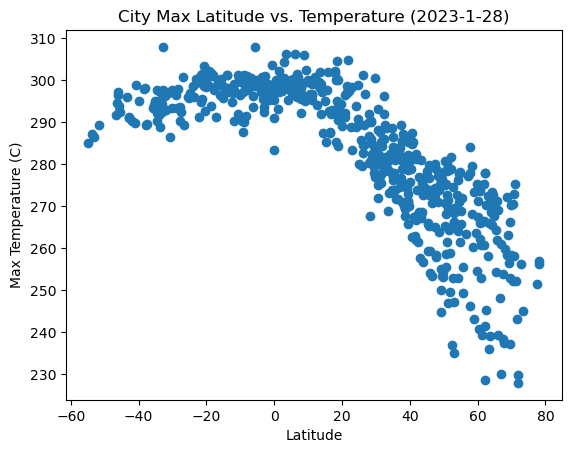

In [191]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

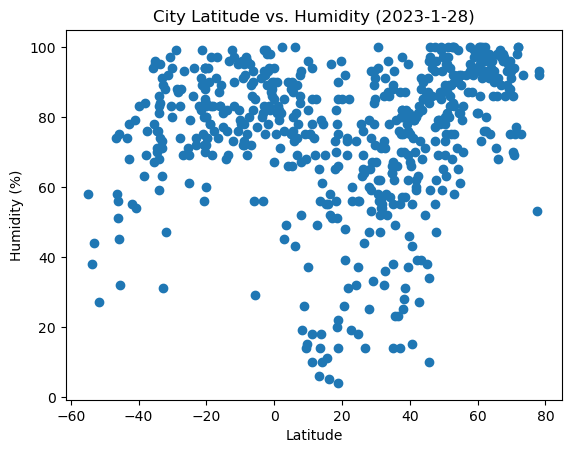

In [192]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

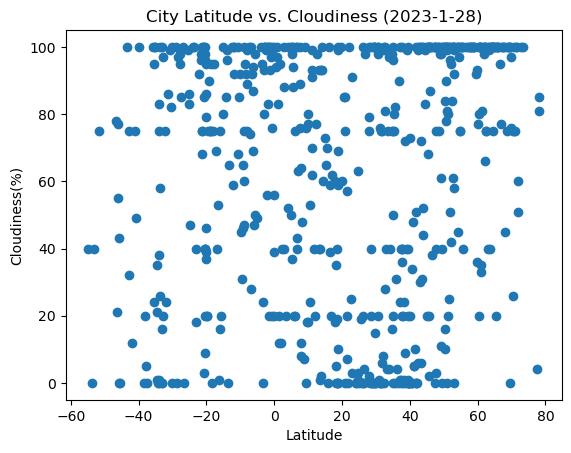

In [193]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

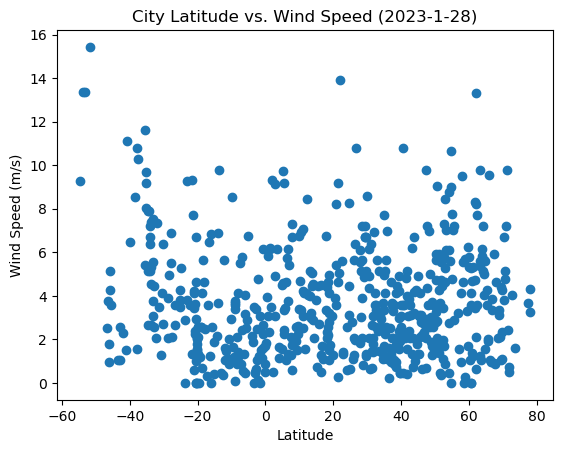

In [194]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-1-28)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [196]:
# Define a function to create Linear Regression plots
def lin_regress(l_x_values,l_y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(l_x_values,l_y_values)

    #Get regression values
    regress_values = l_x_values * slope + intercept

    line_eq = prt_lin_regress(slope,intercept)
    return(regress_values, rvalue, line_eq)

def prt_lin_regress(slope, intercept):

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return(line_eq)


In [197]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,borskoye,53.0259,51.6987,266.22,90,99,5.27,RU,1675115204
2,truro,50.2633,-5.0518,280.79,80,84,3.25,GB,1675115270
3,hobyo,5.3495,48.5264,296.97,66,98,9.71,SO,1675115271
4,chapleau,47.8456,-83.4019,258.18,47,40,3.60,CA,1675115271
6,ouadda,8.0716,22.3962,296.28,19,48,1.92,CF,1675115208


In [198]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,-15.9277,-5.7161,296.34,83,16,6.83,SH,1675115205
5,rikitea,-23.1230,-134.9680,299.35,72,18,3.83,PF,1675115207
7,ushuaia,-54.8061,-68.3185,284.96,58,40,9.26,AR,1675115209
11,carnarvon,-24.8826,113.6576,296.94,79,47,5.26,AU,1675115274
15,punta arenas,-53.1626,-70.9078,286.31,44,40,13.38,CL,1675115276


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7010160017432017


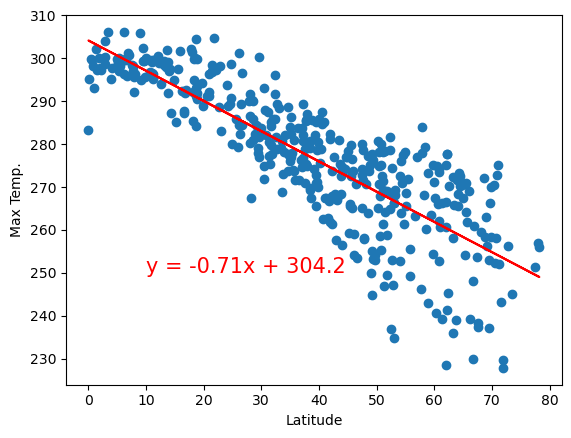

In [200]:
# Linear regression on Northern Hemisphere
l_x_values = northern_hemi_df["Lat"]
l_y_values = northern_hemi_df["Max Temp"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(10,250),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.21092135114312072


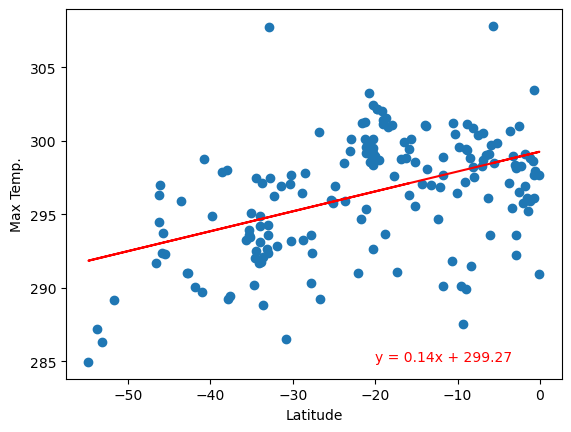

In [202]:
# Linear regression on Southern Hemisphere
l_x_values = southern_hemi_df["Lat"]
l_y_values = southern_hemi_df["Max Temp"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,xy=(-20,285),color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.155978588570612


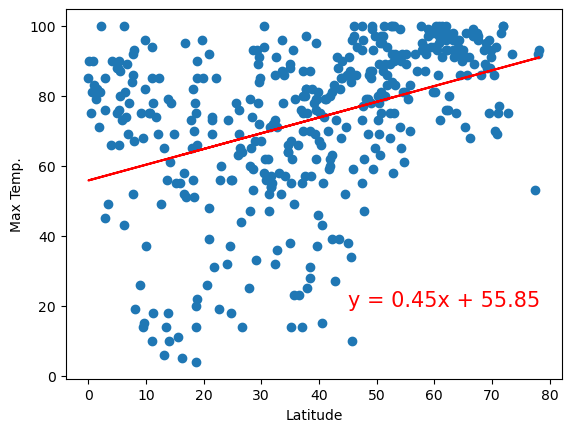

In [205]:
# Northern Hemisphere
l_x_values = northern_hemi_df["Lat"]
l_y_values = northern_hemi_df["Humidity"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.19698683411749526


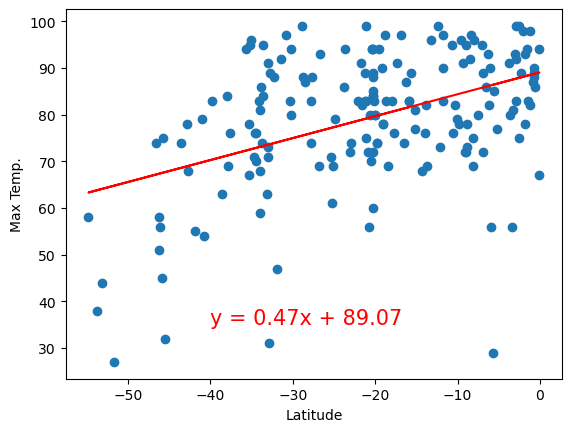

In [206]:
# Southern Hemisphere
l_x_values = southern_hemi_df["Lat"]
l_y_values = southern_hemi_df["Humidity"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07746245449067052


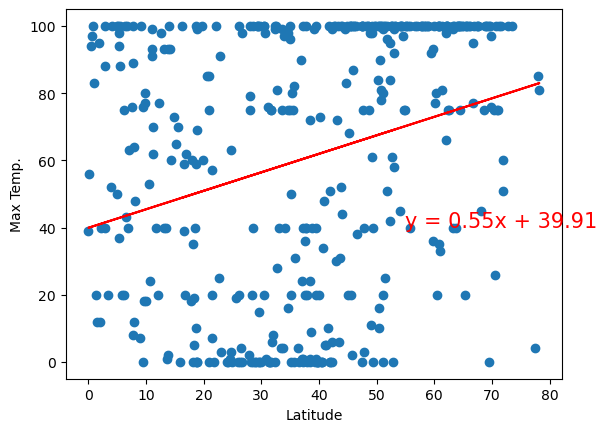

In [208]:
# Northern Hemisphere
l_x_values = northern_hemi_df["Lat"]
l_y_values = northern_hemi_df["Cloudiness"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(55,40),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.09972675457017749


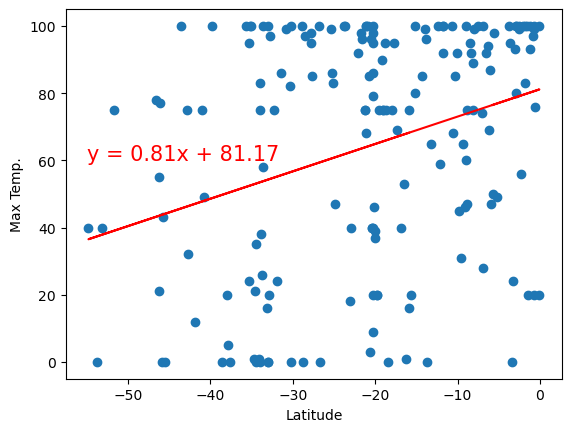

In [210]:
# Southern Hemisphere
l_x_values = southern_hemi_df["Lat"]
l_y_values = southern_hemi_df["Cloudiness"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 7.662260822466635e-05


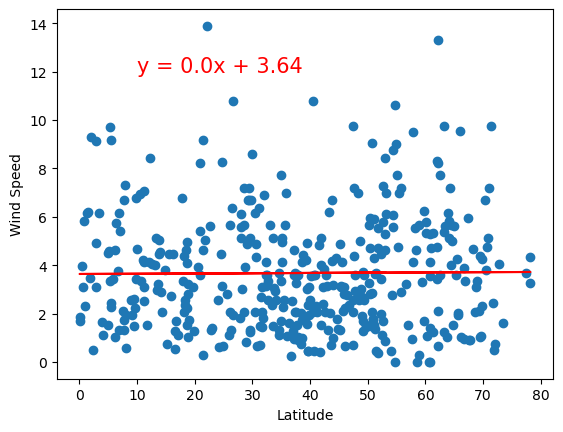

In [213]:
# Northern Hemisphere
l_x_values = northern_hemi_df["Lat"]
l_y_values = northern_hemi_df["Wind Speed"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.2404706332810011


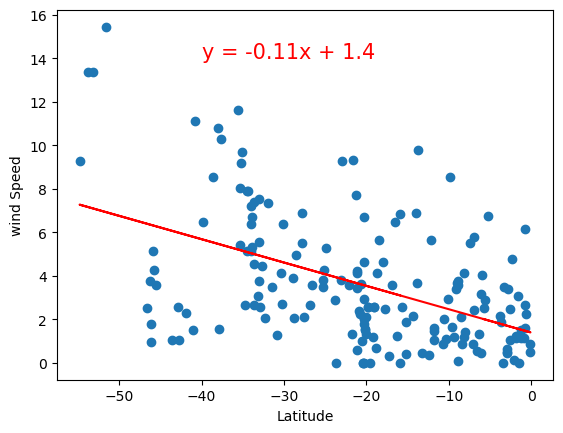

In [215]:
# Southern Hemisphere
l_x_values = southern_hemi_df["Lat"]
l_y_values = southern_hemi_df["Wind Speed"]
(regress_values, rvalue, line_eq) = lin_regress(l_x_values, l_y_values)


plt.scatter(l_x_values,l_y_values)
plt.plot(l_x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("wind Speed")
plt.annotate(line_eq,(-40,14),fontsize=15,color="red")

#Print r values
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE